## ANALYSIS

In [92]:
## -----------IMPORT LIBRARIES
import pandas as pd #for dealing with csv import
import os # for joining paths and filenames sensibly
import numpy as np #for the population std
import glob # for finding csv data files
import platform # paths use different dividers on linux vs windows, so we need to test for this
import csv


In [93]:
path_folder_monkey = 'C:\\Users\\David\\Desktop\\OpenBrains\\games\\monkey_pm'
path_folder_slow = 'C:\\Users\\David\\Desktop\\OpenBrains\\games\\slow_pm'
path_folder_fast = 'C:\\Users\\David\\Desktop\\OpenBrains\\games\\fast_pm'

summary = []

##### Monkey

In [94]:
search_string=os.path.join(path_folder_monkey,'*.csv') 
files = glob.glob(search_string) #list of data files in the named location

#######################################################################################################

frames = []
for filename in files:
    file_path =os.path.join(path_folder_monkey,filename) 

    #import into python using pandas
    try:
        df = pd.read_csv(file_path)
    except pd.io.common.EmptyDataError:
        print('not enough data')
        continue
    
    #
    df_sub = df[['mean_speed', 'max_speed', 'number_trials', 'number_trials_correct', 'key_resp_2.keys']].iloc[-1]
    df_subset = pd.DataFrame(df_sub).transpose()
    frames.append(df_subset)
    
#######################################################################################################

df_ = pd.concat(frames)
df_ ['game'] = 'monkey'
summary.append(df_)
        

##### Slow

In [95]:
search_string=os.path.join(path_folder_slow,'*.csv') 
files = glob.glob(search_string) #list of data files in the named location

#######################################################################################################

frames = []
for filename in files:
    file_path =os.path.join(path_folder_monkey,filename) 

    #import into python using pandas
    try:
        df = pd.read_csv(file_path)
    except pd.io.common.EmptyDataError:
        print('not enough data')
        continue
    
    #
    df_sub = df[['mean_speed', 'max_speed', 'number_trials', 'number_trials_correct', 'key_resp_2.keys']].iloc[-1]
    df_subset = pd.DataFrame(df_sub).transpose()
    frames.append(df_subset)
    
#######################################################################################################

df_ = pd.concat(frames)
df_ ['game'] = 'slow'
summary.append(df_)
        

##### Fast

In [96]:
search_string=os.path.join(path_folder_fast,'*.csv') 
files = glob.glob(search_string) #list of data files in the named location

#######################################################################################################

frames = []
for filename in files:
    file_path =os.path.join(path_folder_monkey,filename) 

    #import into python using pandas
    try:
        df = pd.read_csv(file_path)
    except pd.io.common.EmptyDataError:
        print('not enough data')
        continue
    
    #
    df_sub = df[['mean_speed', 'max_speed', 'number_trials', 'number_trials_correct', 'key_resp_2.keys']].iloc[-1]
    df_subset = pd.DataFrame(df_sub).transpose()
    frames.append(df_subset)
    
#######################################################################################################

df_ = pd.concat(frames)
df_ ['game'] = 'fast'
summary.append(df_)
        

## PLOTS

In [97]:
import pandas as pd #for dealing with csv import
import matplotlib.pyplot as plt  # Matplotlib's pyplot: MATLAB-like syntax
import scipy
from scipy import stats
import numpy as np
import seaborn as sns

c_monk = '#e59500'
c_slow= '#002642'
c_fast = '#840032'

In [98]:
df = pd.concat(summary)
df.head()

,mean_speed,max_speed,number_trials,number_trials_correct,key_resp_2.keys,game
32,0.0190,0.020,30.0,30.0,5.0,monkey
32,0.0185,0.021,50.0,40.0,5.0,monkey
32,0.0210,0.025,75.0,55.0,4.0,monkey
32,0.0170,0.020,30.0,20.0,4.0,monkey
32,0.0220,0.025,75.0,60.0,5.0,monkey


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


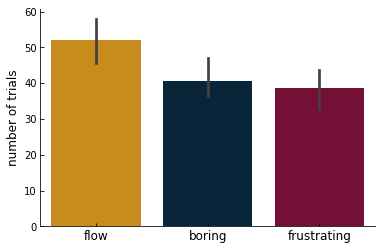

Ttest_indResult(statistic=1.1992507023933785, pvalue=0.2535751629736883)
Ttest_indResult(statistic=1.4912475655799244, pvalue=0.16170921574723907)
Ttest_indResult(statistic=0.2532449735475091, pvalue=0.8043653784758868)


In [108]:
########### NUMBER OF TRIALS

plt.figure()
sns.barplot(x='game', y='number_trials', order = ['monkey', 'slow', 'fast'], 
            palette=[c_monk, c_slow, c_fast], ci=68, estimator=np.mean, data=df)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.ylim(0,1.5)
#plt.yticks([0,0.5,1,1.5])
plt.ylabel('number of trials', fontsize=12)
plt.xlabel('')
plt.xticks([0,1,2], ['flow', 'boring', 'frustrating'], fontsize=12)
plt.show(block=False)


print(scipy.stats.ttest_ind(df.loc[df['game']=='monkey', 'number_trials'].values, df.loc[df['game']=='slow', 'number_trials'].values) )
print(scipy.stats.ttest_ind(df.loc[df['game']=='monkey', 'number_trials'].values, df.loc[df['game']=='fast', 'number_trials'].values) )
print(scipy.stats.ttest_ind(df.loc[df['game']=='slow', 'number_trials'].values, df.loc[df['game']=='fast', 'number_trials'].values) )


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


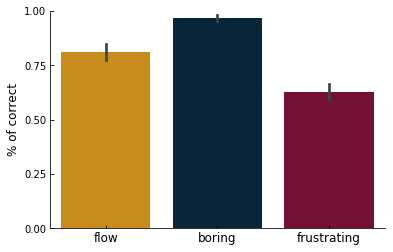

Ttest_indResult(statistic=-3.753686315941929, pvalue=0.002752409779777145)
Ttest_indResult(statistic=3.391542046791833, pvalue=0.005352726311515133)
Ttest_indResult(statistic=8.615159722692395, pvalue=1.7473005076329585e-06)


In [100]:
########### PERCENTAGE OF CORRECT

df['percentage_correct'] = df['number_trials_correct'] / df['number_trials']


plt.figure()
sns.barplot(x='game', y='percentage_correct', order = ['monkey', 'slow', 'fast'], 
            palette=[c_monk, c_slow, c_fast], ci=68, estimator=np.mean, data=df)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.ylim(0,1.)
plt.yticks([0,0.25,0.5,0.75,1])
plt.ylabel('% of correct', fontsize=12)
plt.xlabel('')
plt.xticks([0,1,2], ['flow', 'boring', 'frustrating'], fontsize=12)
plt.show(block=False)


print(scipy.stats.ttest_ind(df.loc[df['game']=='monkey', 'percentage_correct'].values, df.loc[df['game']=='slow', 'percentage_correct'].values) )
print(scipy.stats.ttest_ind(df.loc[df['game']=='monkey', 'percentage_correct'].values, df.loc[df['game']=='fast', 'percentage_correct'].values) )
print(scipy.stats.ttest_ind(df.loc[df['game']=='slow', 'percentage_correct'].values, df.loc[df['game']=='fast', 'percentage_correct'].values) )


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


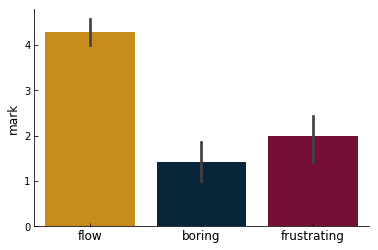

Ttest_indResult(statistic=5.54700196225229, pvalue=0.00012637775949151845)
Ttest_indResult(statistic=3.771236166328253, pvalue=0.002665783856189283)
Ttest_indResult(statistic=-0.834057656228299, pvalue=0.42054182800471973)


In [101]:
########### EVALUATION OF THE GAME

plt.figure()
sns.barplot(x='game', y='key_resp_2.keys', order = ['monkey', 'slow', 'fast'], 
            palette=[c_monk, c_slow, c_fast], ci=68, estimator=np.mean, data=df)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.ylim(0,1.5)
#plt.yticks([0,0.5,1,1.5])
plt.ylabel('mark', fontsize=12)
plt.xlabel('')
plt.xticks([0,1,2], ['flow', 'boring', 'frustrating'], fontsize=12)
plt.show(block=False)


print(scipy.stats.ttest_ind(df.loc[df['game']=='monkey', 'key_resp_2.keys'].values, df.loc[df['game']=='slow', 'key_resp_2.keys'].values) )
print(scipy.stats.ttest_ind(df.loc[df['game']=='monkey', 'key_resp_2.keys'].values, df.loc[df['game']=='fast', 'key_resp_2.keys'].values) )
print(scipy.stats.ttest_ind(df.loc[df['game']=='slow', 'key_resp_2.keys'].values, df.loc[df['game']=='fast', 'key_resp_2.keys'].values) )
